# USING NBA API TO ANALYZE GAME STATS

In [8]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

In [27]:
#INSTALL PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import seaborn as sns

In [10]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [11]:
#GET THE TEAM IN A DICTIONARY
nba_teams = teams.get_teams()

In [12]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [13]:
#CONVERT TO PANDAS DATAFRAME
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [14]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [17]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

In [18]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [34]:
#gamefinder.get_json()

In [35]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900602,2020-01-14,GSW vs. DAL,L,239,97,...,0.769,7.0,29.0,36.0,27,4,1,14,16,-27.0
1,22019,1610612744,GSW,Golden State Warriors,0021900588,2020-01-12,GSW @ MEM,L,241,102,...,0.714,12.0,35.0,47.0,23,11,6,22,18,-20.0
2,22019,1610612744,GSW,Golden State Warriors,0021900576,2020-01-10,GSW @ LAC,L,241,100,...,0.720,13.0,33.0,46.0,28,9,1,10,22,-9.0
3,22019,1610612744,GSW,Golden State Warriors,0021900562,2020-01-08,GSW vs. MIL,L,239,98,...,0.850,12.0,40.0,52.0,29,7,4,18,30,-9.0
4,22019,1610612744,GSW,Golden State Warriors,0021900547,2020-01-06,GSW @ SAC,L,240,98,...,0.781,10.0,34.0,44.0,19,13,4,17,18,-13.0


The game finder object has a method get_data_frames(), that returns a dataframe. If we view the dataframe, we can see it contains information about all the games the Warriors played. The PLUS_MINUS column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column MATCHUP had the team the Warriors were playing, GSW stands for golden state and TOR means Toronto Raptors; vs signifies it was a home game and the @ symbol means an away game.

In [36]:
games.describe()

,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
count,3.285000e+03,3285.00000,3285.000000,3285.000000,3285.000000,3284.000000,3285.000000,3284.000000,3261.000000,3285.000000,...,3284.000000,3283.000000,3283.000000,3282.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,2163.000000
mean,1.610613e+09,240.65449,105.753425,39.882192,86.414307,0.462031,6.223744,17.314860,0.337771,19.765297,...,0.753413,12.814194,30.501980,43.329372,23.554642,8.622527,5.221309,15.463318,23.041400,0.300601
std,0.000000e+00,12.05399,14.768476,6.203792,8.648592,0.059713,4.517544,10.057532,0.152380,7.130719,...,0.102867,4.781982,5.858704,6.964554,5.856263,3.155527,2.734390,4.193799,4.891464,14.710332
min,1.610613e+09,0.00000,0.000000,0.000000,0.000000,0.259000,0.000000,0.000000,0.000000,0.000000,...,0.375000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.000000
25%,1.610613e+09,240.00000,96.000000,36.000000,81.000000,0.420000,3.000000,9.000000,0.250000,15.000000,...,0.686000,9.000000,27.000000,39.000000,20.000000,6.000000,3.000000,12.000000,20.000000,-9.000000
50%,1.610613e+09,240.00000,106.000000,40.000000,86.000000,0.462000,5.000000,16.000000,0.343000,19.000000,...,0.761500,12.000000,30.000000,43.000000,23.000000,8.000000,5.000000,15.000000,23.000000,0.000000
75%,1.610613e+09,240.00000,116.000000,44.000000,92.000000,0.505000,9.000000,25.000000,0.433000,24.000000,...,0.826000,16.000000,34.000000,48.000000,27.000000,11.000000,7.000000,18.000000,26.000000,10.000000
max,1.610613e+09,460.00000,162.000000,63.000000,125.000000,0.646000,24.000000,49.000000,1.000000,55.000000,...,1.000000,33.000000,55.000000,72.000000,47.000000,25.000000,18.000000,35.000000,41.000000,50.000000


From the describe function we can see some descriptive statistics for the team:
The biggest lost is by 48 points loss.
Biggest win is a win by 50 points.

In [37]:
#link to download: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [38]:
#define the home games and the away games
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [39]:
#mean for home games:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [40]:
#mean for away games:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

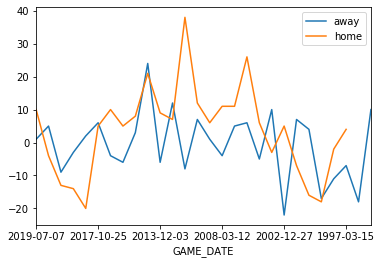

In [41]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

From the graph above and the mean calculated, we can see that the team performed better at home games. Most part of the 'home' graph is above the 'away' graph. 

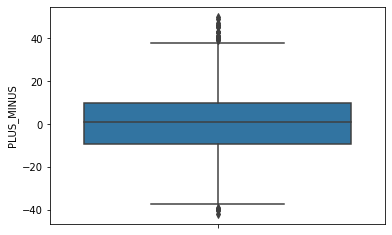

In [42]:
#boxplot of the plus_minus column
sns.boxplot( y=games["PLUS_MINUS"] )

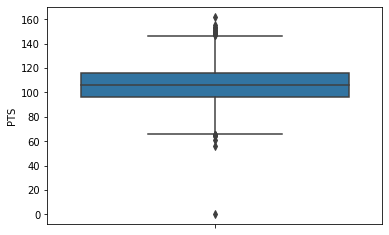

In [43]:
#Boxplot of the game points for the 
sns.boxplot( y=games["PTS"] )

From the graph we can see that the outliers are 60 pts and below or 140 pts and above. 25th to 75th percentile falls between 96-116 pts.

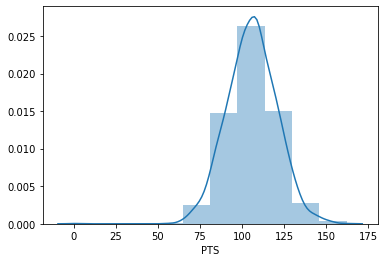

In [44]:
sns.distplot( games["PTS"], bins=10)

The histogram makes sense.Due to the nature of how basketball is scored (1pointer 2 pointer 3 pointer), basketball is a high-scored game. Thus, the game's score range usually falls above 60 points.
However, the dataset is very small. Only 28 games were included. 
https://pypi.org/project/nba-api/